## KMeans

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

import warnings
warnings.filterwarnings('ignore')

### Impotação das tabelas

In [2]:
overview2021 = pd.read_csv("dataset/vct_2021/matches/overview.csv")
overview2022 = pd.read_csv("dataset/vct_2022/matches/overview.csv")
overview2023 = pd.read_csv("dataset/vct_2023/matches/overview.csv")

In [3]:
personalizado_paleta = ['#1f77b4', '#ff7f0e', '#666666']

### Limpeza e filtragem dos dados

In [4]:
ovw2021_group = overview2021[["Average Combat Score", "Average Damage per Round"]]
ovw2021_group = ovw2021_group [ ovw2021_group['Average Combat Score'] >= 0]
ovw2021_group = ovw2021_group [ ovw2021_group['Average Damage per Round'] < 550]

overview2021_group = ovw2021_group.dropna()

ovw2022_group = overview2022[["Average Combat Score", "Average Damage per Round"]]
ovw2022_group = ovw2022_group [ ovw2022_group['Average Combat Score'] >= 0]
ovw2022_group = ovw2022_group [ ovw2022_group['Average Damage per Round'] < 550]

overview2022_group = ovw2022_group.dropna()

ovw2023_group = overview2023[["Average Combat Score", "Average Damage per Round"]]
ovw2023_group = ovw2023_group [ ovw2023_group['Average Combat Score'] >= 0]
ovw2023_group = ovw2023_group [ ovw2023_group['Average Damage per Round'] < 550]

overview2023_group = ovw2023_group.dropna()

overview_group = pd.concat([overview2021_group, overview2022_group, overview2023_group], axis=0, ignore_index=True)

In [5]:
kmeans = KMeans(n_clusters=3)

### 2021:

In [6]:
kmeans.fit(overview2021_group)

KMeans(n_clusters=3)

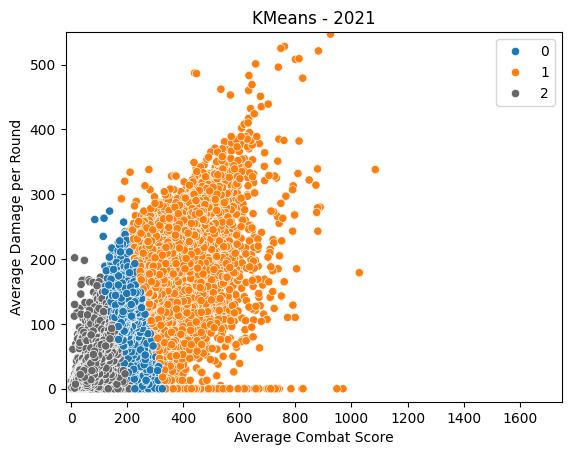

In [7]:
sns.scatterplot(data=overview2021_group, x="Average Combat Score", y="Average Damage per Round", hue=kmeans.labels_, palette= personalizado_paleta)
plt.xlim(-20, 1750)
plt.ylim(-20, 550)
plt.title('KMeans - 2021')

plt.show()

### 2022:

In [8]:
kmeans.fit(overview2022_group)

KMeans(n_clusters=3)

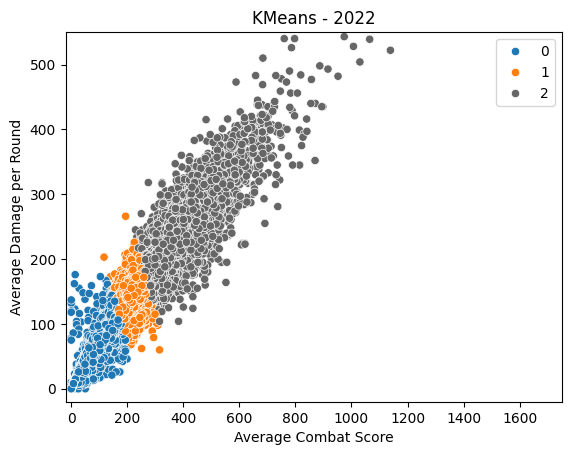

In [9]:
sns.scatterplot(data=overview2022_group, x="Average Combat Score", y="Average Damage per Round", hue=kmeans.labels_, palette= personalizado_paleta)
plt.xlim(-20, 1750)
plt.ylim(-20, 550)
plt.title('KMeans - 2022')

plt.show()

### 2023:

In [10]:
kmeans.fit(overview2023_group)

KMeans(n_clusters=3)

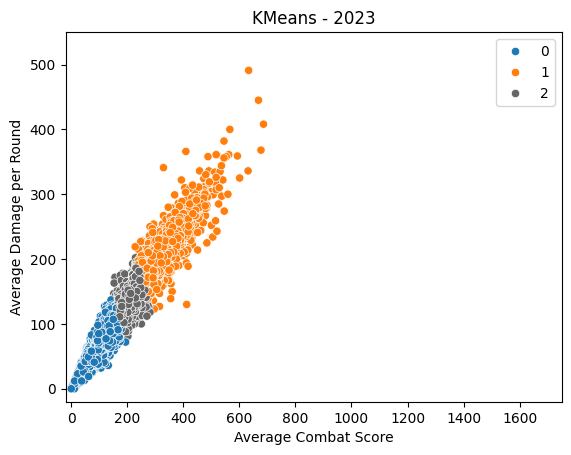

In [11]:
sns.scatterplot(data=overview2023_group, x="Average Combat Score", y="Average Damage per Round", hue=kmeans.labels_, palette= personalizado_paleta)
plt.xlim(-20, 1750)
plt.ylim(-20, 550)
plt.title('KMeans - 2023')

plt.show()

### 2021, 2022 e 2023:

In [12]:
kmeans.fit(overview_group)

KMeans(n_clusters=3)

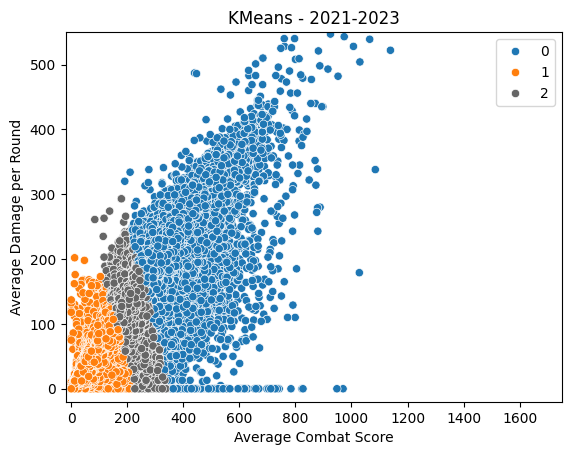

In [13]:
sns.scatterplot(data=overview_group, x="Average Combat Score", y="Average Damage per Round", hue=kmeans.labels_, palette= personalizado_paleta)
plt.xlim(-20, 1750)
plt.ylim(-20, 550)
plt.title('KMeans - 2021-2023')

plt.show()

Percebe-se que, em grande parte dos casos, o aumento do dano médio por rodada (Average Damage per Round) está diretamente relacionado à pontuação média de combate (Average Combat Score). É notório também que a maioria dos dados está centralizada em uma parte do gráfico, o que indica que a maior parte dos jogadores segue um mesmo padrão. Também fica evidente que, como os dados seguem um padrão, os pontos que possuem o Average Damage per Round igual a zero podem ser considerados outliers.

A analise também nos mostra que no ano de 2021 os dados variaram bastante, o que pode significar que, por se tratar do início dos campeonatos, ainda existia um certo amadorismo na coleta dos dados, tendo dados distorcidos. Em 2022, percebe-se uma evolução em relação a 2021; ainda assim, existe uma grande variação entre os dados. Já em 2023, nota-se uma maior linearidade nos dados, o que indica uma evolução uniforme das equipes, ou seja, uma evolução no nível das disputas.

Por fim, é possível perceber que as clusters no ano de 2022 e 2023 podem indicar os níveis das equipes que disputam o Valorant. Por exemplo, no ano de 2023, as melhores equipes estão representadas na cluster 0 (azul).